In [20]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/wzhang/Documents/injury data cleaned.csv')

X = pd.DataFrame(dataset.iloc[:,1:19].values)
Y = pd.DataFrame(dataset.iloc[:,19:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(Y_train.shape)

      0   1   2   3   4   5    6   7   8   9   10  11  12  13  14  15  16  17
0      1   1   5   1  16   0  106   1   2  13   3  20   0   0   0   0   2   5
1      1  10  12  10  15   2  104   2   2  13   3   8   0   1   0   0   1   5
2      2   1   9  24  21   6  103   2   2  13   3   8   0   0   0   0   1   3
3      1   1  12   9   8   2  102   1   1  11   3   8   0   0   0   0   2   3
4      2   1   6   3  13   1  101   1   2  13   3   8   0   0   0   0   2   4
...   ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
9919   1   1   5  30  17   0   60   1   1  11   3  20   0   0   0   0   2   2
9920   1   1  10  29  18   6   60   1   1  11   3   3   0   0   0   0   2   3
9921   4   1   6   6  16   6   60   2   1  11   3   8   0   0   0   0   1   4
9922   1   1  11  15  13   6   60   1   1  11   3   8   0   1   0   0   1   5
9923   1   1  12  29  21   6   60   1   1  11  20   8   0   1   1   0   1   6

[9924 rows x 18 columns]
      0
0     4
1     4
2     4
3     

In [21]:
features = pd.DataFrame(dataset.iloc[:,1:19])
features = features.columns
print(features)

Index(['LGT_COND', 'WEATHER', 'MONTH', 'DAY', 'HOUR', 'MAN_COLL', 'AGE', 'SEX',
       'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG', 'EJECTION', 'EXTRICAT',
       'DRINKING', 'DRUGS', 'RUR_URB', 'FUNC_SYS'],
      dtype='object')


In [22]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier 

In [23]:
# Initialize Random Forest regressor
model = DecisionTreeClassifier(min_samples_split = 100, min_samples_leaf = 100, random_state=42)

# Train the model
model.fit(X_train, Y_train)




DecisionTreeClassifier(min_samples_leaf=100, min_samples_split=100,
                       random_state=42)

In [24]:
res = model.predict(X_test)
print(res)
print(Y_test)

[4 4 0 ... 4 4 0]
      0
6203  0
3294  4
6762  0
5582  4
5308  0
...  ..
3677  4
2007  0
3442  4
3931  2
3201  0

[1985 rows x 1 columns]


In [25]:
res = np.array(res)
print(res)

[4 4 0 ... 4 4 0]


In [26]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

0.7571788413098237
              precision    recall  f1-score   support

           0   0.643357  0.773109  0.702290       357
           1   0.000000  0.000000  0.000000        83
           2   0.000000  0.000000  0.000000       128
           3   0.000000  0.000000  0.000000       112
           4   0.788560  0.940230  0.857742      1305

    accuracy                       0.757179      1985
   macro avg   0.286383  0.342668  0.312006      1985
weighted avg   0.634131  0.757179  0.690212      1985



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [30]:
model.predict_proba(X_test)

array([[0.08843537, 0.00680272, 0.06122449, 0.17687075, 0.66666667],
       [0.00699301, 0.        , 0.00699301, 0.        , 0.98601399],
       [0.89115646, 0.02040816, 0.02040816, 0.00680272, 0.06122449],
       ...,
       [0.04761905, 0.08571429, 0.19047619, 0.20952381, 0.46666667],
       [0.0052356 , 0.01570681, 0.05235602, 0.07853403, 0.84816754],
       [0.56216216, 0.07567568, 0.10810811, 0.05945946, 0.19459459]])

In [31]:
print(model.predict(X_test))

[4 4 0 ... 4 4 0]


In [29]:
print(Y_test)

      0
6203  0
3294  4
6762  0
5582  4
5308  0
...  ..
3677  4
2007  0
3442  4
3931  2
3201  0

[1985 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PermutationExplainer explainer: 1986it [00:21, 58.09it/s]                           


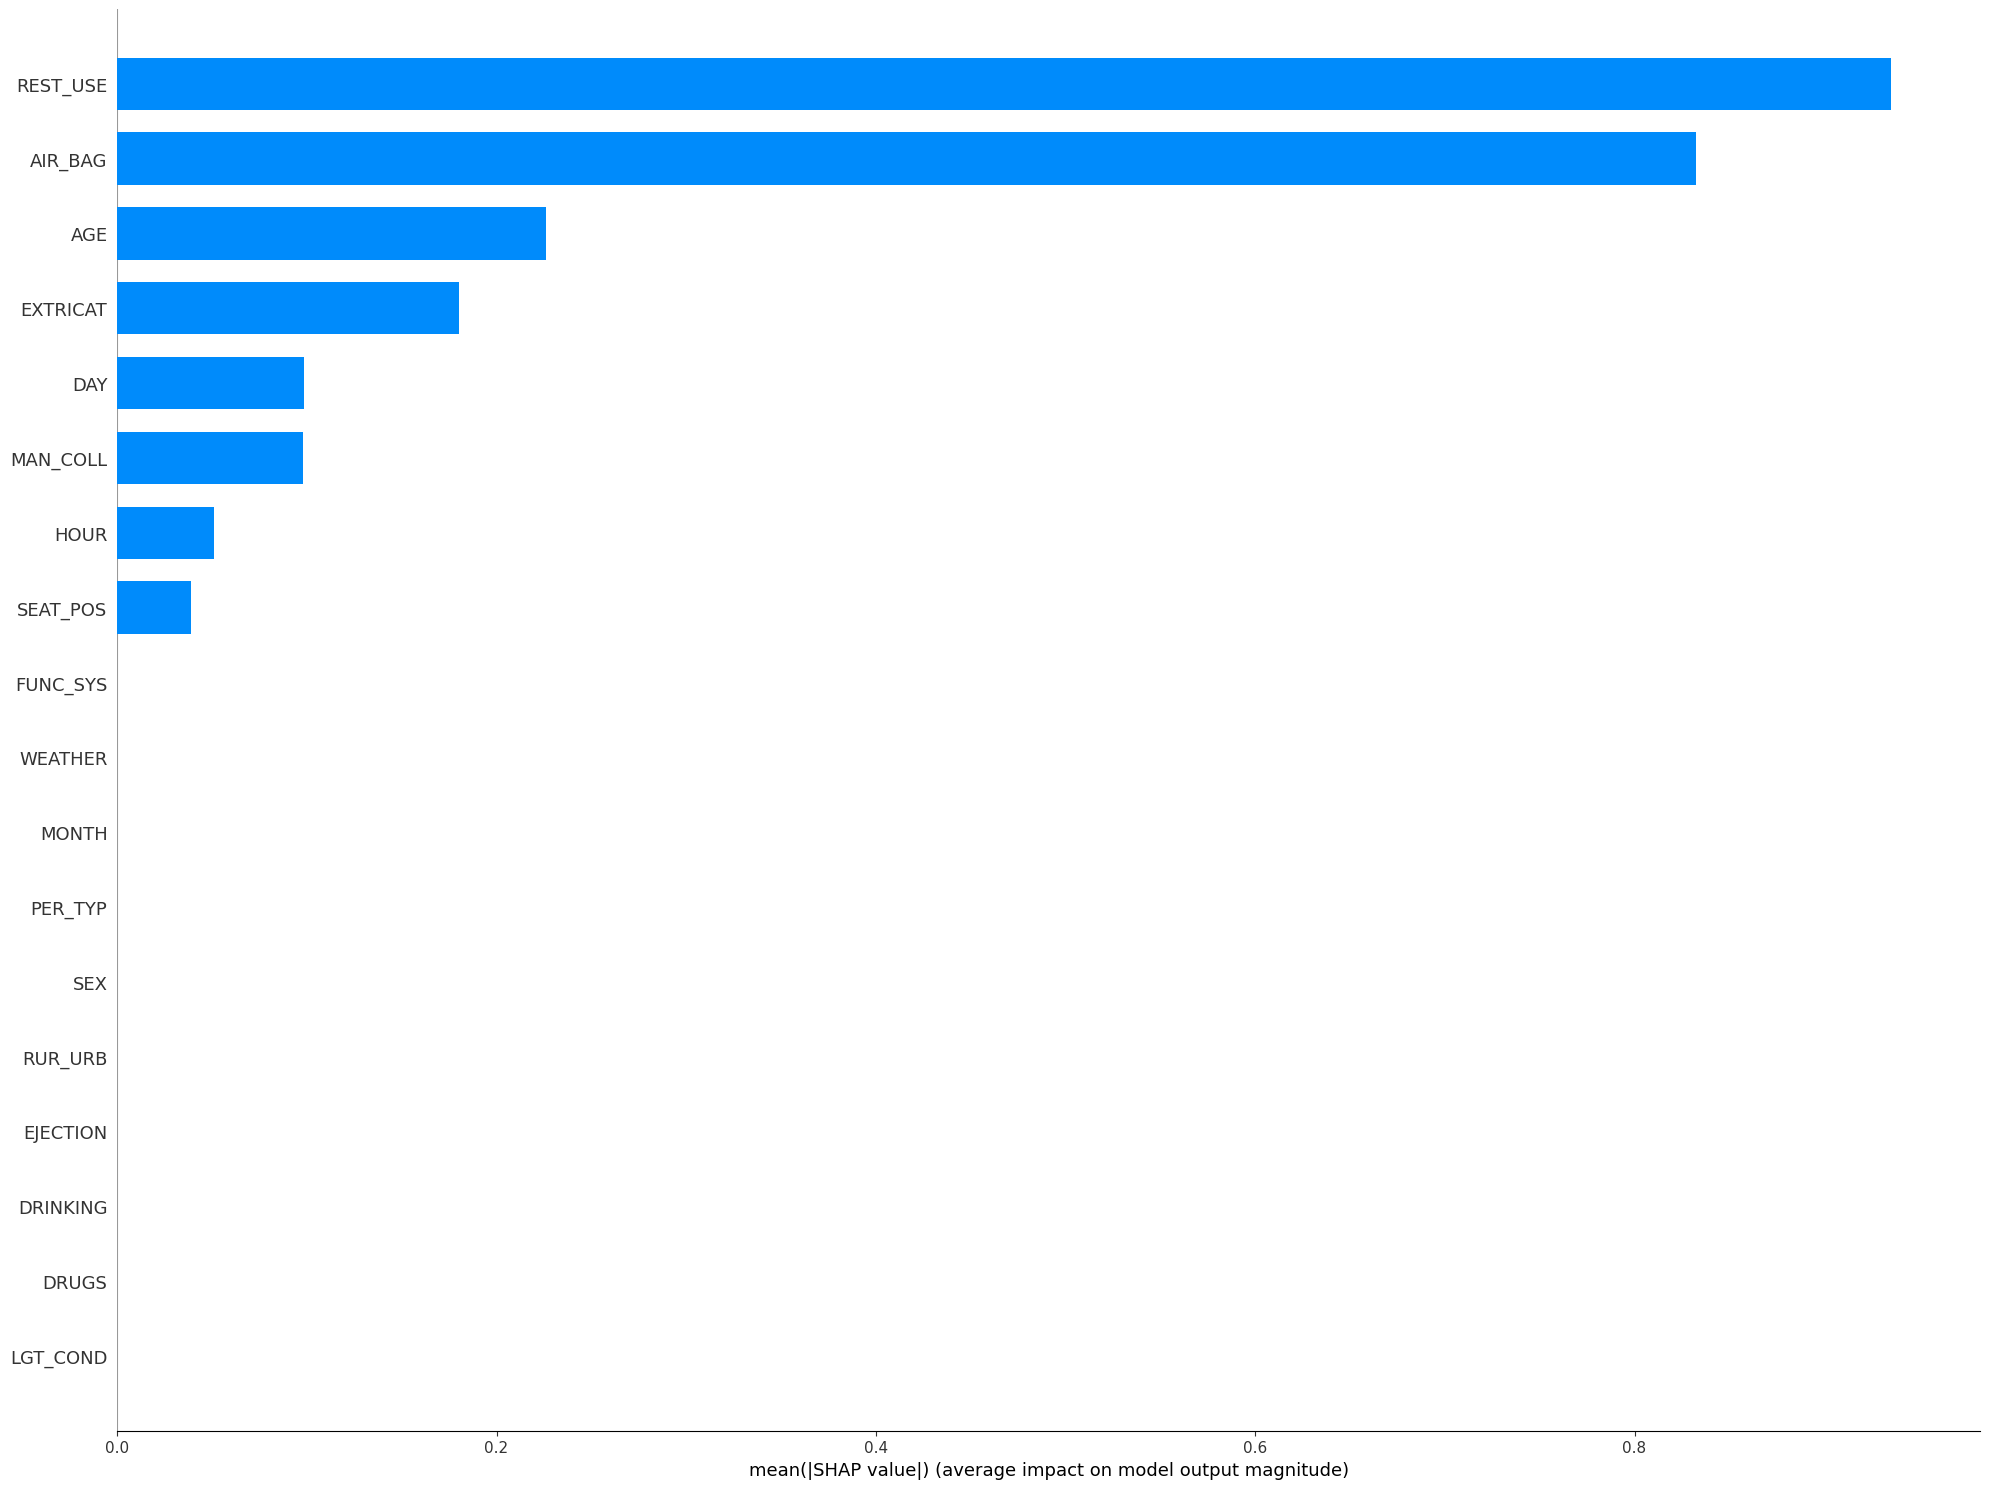

In [28]:
import shap
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values,X_train,feature_names = features,plot_type="bar", plot_size=(20,15),show=False)